In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [2]:
tf.config.experimental.list_logical_devices()

[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

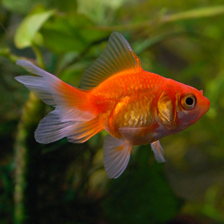

In [4]:
#PIL.Image.open('C:/Users/ys726/Desktop/DL/transfer_learning/goldfish.jpg')
gold_fish = PIL.Image.open('./datasets/goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/225
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish

array([[[0.32      , 0.37777778, 0.08      ],
        [0.35555556, 0.42222222, 0.10222222],
        [0.39555556, 0.47555556, 0.13333333],
        ...,
        [0.37333333, 0.44444444, 0.00444444],
        [0.36444444, 0.43555556, 0.00444444],
        [0.35111111, 0.41777778, 0.        ]],

       [[0.32444444, 0.37777778, 0.09333333],
        [0.36888889, 0.43111111, 0.12444444],
        [0.4       , 0.48      , 0.14666667],
        ...,
        [0.36444444, 0.43111111, 0.00444444],
        [0.35555556, 0.42222222, 0.00444444],
        [0.34222222, 0.40888889, 0.        ]],

       [[0.32444444, 0.37777778, 0.09777778],
        [0.35555556, 0.41777778, 0.11555556],
        [0.39111111, 0.47111111, 0.14666667],
        ...,
        [0.36      , 0.42666667, 0.00444444],
        [0.35111111, 0.41777778, 0.00888889],
        [0.33777778, 0.40444444, 0.00444444]],

       ...,

       [[0.06222222, 0.12444444, 0.01777778],
        [0.05777778, 0.12888889, 0.02222222],
        [0.05777778, 0

In [7]:
'''We are adding one more dimenstion. the reason we are doing this because 
   when we do prediction so prediction accept multiple image as an input'''
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 4s 4s/step


(1, 1001)

In [9]:
result

array([[ 0.2335262 ,  2.0008483 ,  9.742843  , ..., -1.580984  ,
        -0.26749128, -0.22654414]], dtype=float32)

In [10]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [11]:
image_labels = []
with open("./datasets/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [12]:
image_labels[predicted_label_index]

'goldfish'

## Use this pretrained model for our flowers dataset.

In [13]:
url = "http://download.tensorflow.org/example_images/flower_photos.tgz" 
data_dir = tf.keras.utils.get_file('flower_photos', origin=url, cache_dir='.', untar=True)

In [14]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [15]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [16]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

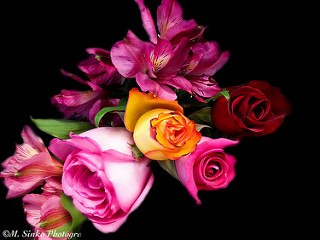

In [17]:
PIL.Image.open(roses[6])

In [18]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[WindowsPath('datasets/flower_photos/tulips/100930342_92e8746431_n.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10094731133_94a942463c.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10128546863_8de70c610d.jpg'),
 WindowsPath('datasets/flower_photos/tulips/10163955604_ae0b830975_n.jpg')]

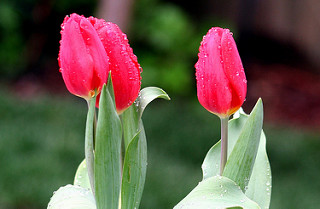

In [19]:
PIL.Image.open(tulips[0])

In [20]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
}

In [21]:
flowers_labels_dict = {
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [22]:
# Creating the dataset X contains flower images (3D numpy array) and y contains flower name (flower number)
X, y = [], []
for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_image)
        y.append(flowers_labels_dict[flower_name])


In [23]:
# Converting list into numpy array
X = np.array(X)
y = np.array(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [25]:
print(len(X_train))
print(len(X_test))

2752
918


In [26]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [27]:
print(X_train_scaled.shape)
f"input layer size = {224*224*3}"

(2752, 224, 224, 3)


'input layer size = 150528'

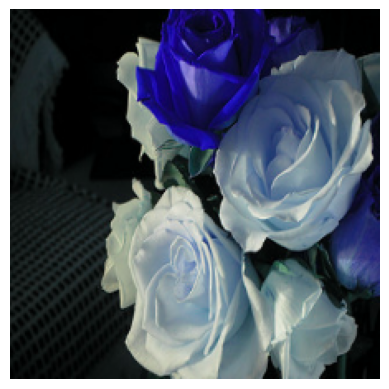

In [28]:
plt.axis('off')
plt.imshow(X[1])

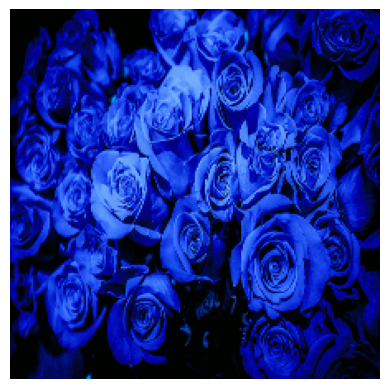

In [29]:
plt.axis('off')
plt.imshow(X[2])

In [30]:
# Lry to use our classifier to pridict this model & classifier is the pretrained model
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 530ms/step


array([795, 880, 795], dtype=int64)

In [31]:
image_labels[795], image_labels[880],image_labels[795]

('shower curtain', 'umbrella', 'shower curtain')

<b> So here we can not use readymate model.


In [32]:
# Now I am going to retrain this model.

'''This will give us the same model as 
    previous one except the last layer'''

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False 
    ) # trainable=False means --> Don't train all those layes have fixed weights


In [33]:
num_of_flowers = 5 # (or output shape)

model = tf.keras.Sequential([
    #Putting that readymate model
    pretrained_model_without_top_layer,

    # Dense Network
    tf.keras.layers.Dense(num_of_flowers, activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [34]:
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy']
#               )

# model.fit(X_train_scaled, y_train, epochs=1, batch_size=1000)

In [35]:
# Creating a function for applying the model
def get_model():
    
    model = tf.keras.Sequential([
    #Putting that readymate model
    pretrained_model_without_top_layer,

    # Dense Network
    tf.keras.layers.Dense(num_of_flowers, activation="softmax")
        ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
    
    return model

In [39]:
# Running on CPU
import time
start_time = time.time()

with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train, epochs=5)

end_time = time.time()
print("CPU Execution time:", end_time - start_time)

Epoch 1/5
86/86 [==============================] - 33s 371ms/step - loss: 0.7857 - accuracy: 0.7158
Epoch 2/5
86/86 [==============================] - 30s 352ms/step - loss: 0.4086 - accuracy: 0.8554
Epoch 3/5
86/86 [==============================] - 29s 342ms/step - loss: 0.3127 - accuracy: 0.8921
Epoch 4/5
86/86 [==============================] - 30s 355ms/step - loss: 0.2653 - accuracy: 0.9161
Epoch 5/5
86/86 [==============================] - 30s 347ms/step - loss: 0.2264 - accuracy: 0.9364
CPU Execution time: 153.76738381385803


In [1]:
# # Running on GPU
# start_time = time.time()

# with tf.device('/GPU:0'):
#     gpu_model = get_model()
#     gpu_model.fit(X_train_scaled, y_train, epochs=5)

# end_time = time.time()
# print("GPU Execution time:", end_time - start_time)